In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import sklearn
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import glob
import pandas as pd

In [ ]:
base_path = '/content/drive/MyDrive/Images/'
file_array = []
for i in range(4):
  file_array.append(glob.glob(base_path + str(i) + '/*.jpg'))

print(file_array)

[['/content/drive/MyDrive/Images/0/3.jpg', '/content/drive/MyDrive/Images/0/2.jpg', '/content/drive/MyDrive/Images/0/1.jpg', '/content/drive/MyDrive/Images/0/0.jpg', '/content/drive/MyDrive/Images/0/9.jpg', '/content/drive/MyDrive/Images/0/8.jpg', '/content/drive/MyDrive/Images/0/7.jpg', '/content/drive/MyDrive/Images/0/6.jpg', '/content/drive/MyDrive/Images/0/5.jpg', '/content/drive/MyDrive/Images/0/4.jpg'], ['/content/drive/MyDrive/Images/1/1.jpg', '/content/drive/MyDrive/Images/1/0.jpg', '/content/drive/MyDrive/Images/1/9.jpg', '/content/drive/MyDrive/Images/1/8.jpg', '/content/drive/MyDrive/Images/1/7.jpg', '/content/drive/MyDrive/Images/1/6.jpg', '/content/drive/MyDrive/Images/1/5.jpg', '/content/drive/MyDrive/Images/1/4.jpg', '/content/drive/MyDrive/Images/1/3.jpg', '/content/drive/MyDrive/Images/1/2.jpg'], ['/content/drive/MyDrive/Images/2/7.jpg', '/content/drive/MyDrive/Images/2/6.jpg', '/content/drive/MyDrive/Images/2/5.jpg', '/content/drive/MyDrive/Images/2/4.jpg', '/content/

In [ ]:
random.seed(42)
image_index_array = random.sample(range(0,9), 7)
print(image_index_array)

[1, 0, 5, 2, 8, 4, 7]


In [ ]:
tr_images = []
test_images = []

for j in file_array:
  t_train = []
  t_test = []
  for i in range(10):
    if i in image_index_array:
      t_train.append(j[i])
    else:
      t_test.append(j[i])
  tr_images.append(t_train)
  test_images.append(t_test)

print(np.shape(tr_images))

(4, 7)


In [ ]:
train = []
test = []

for i in range(7):
  t = []
  for j in tr_images:
    t.append(cv2.imread(j[i]))
  train.append(t)

for i in range(3):
  t = []
  for j in test_images:
    t.append(cv2.imread(j[i]))
  test.append(t)

#plt.figure(), plt.imshow(train[0])


In [ ]:
#plt.figure(), plt.imshow(train[0][0])

In [ ]:
print(np.shape(train[0][0]))

(640, 480, 3)


In [ ]:
for index, classes in enumerate(train):
  for index2, image in enumerate(classes):
    im_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    train[index][index2] = cv2.resize(im_rgb,(480,640))

for index, classes in enumerate(test):
  for index2, image in enumerate(classes):
    im_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    test[index][index2] = cv2.resize(im_rgb,(480,640))

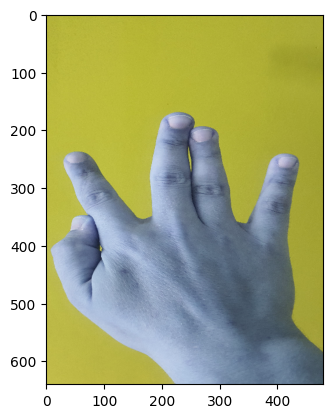

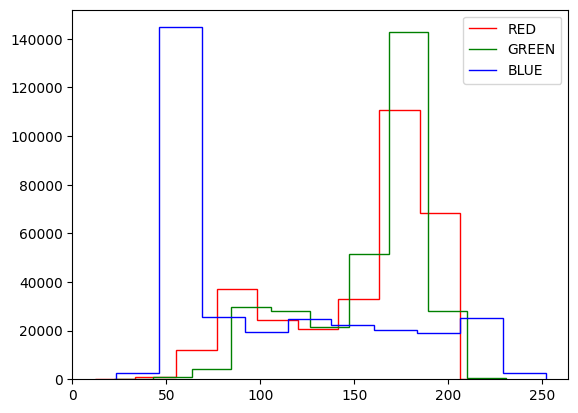

In [ ]:
#plt.figure(), plt.imshow(train[0][0])
colours = ('r', 'g', 'b')
plt.imshow(train[0][0])
plt.figure()
for color in range(3): #0, 1, 2 - RED, GREEN, BLUE
  counts, bins = np.histogram(train[0][0][:,:,color])
  plt.stairs(counts, bins, color = colours[color])
plt.legend(['RED', 'GREEN', 'BLUE'])

In [ ]:
def get_hand_from_img(image):
  green_pixels = np.array(image[:,:,2])
  green_pixels[green_pixels < 75] = 0
  plt.imshow(green_pixels, cmap='gray')

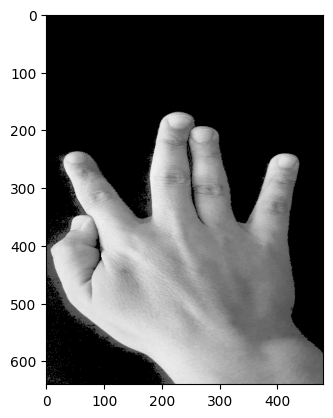

In [ ]:
get_hand_from_img(train[0][0])

Text(0.5, 1.0, 'Binary mask')

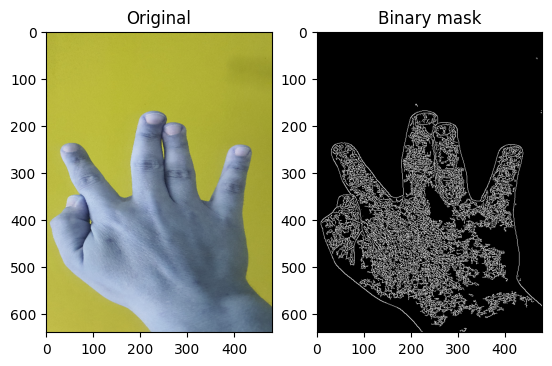

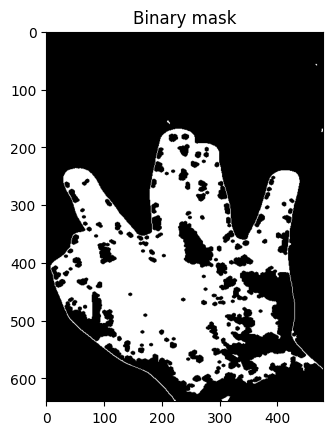

In [ ]:
img = train[0][0]
edges = cv2.Canny(img, 10, 80)
plt.figure(1)
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.subplot(122)
plt.imshow(edges, cmap="gray")
plt.title("Binary mask")
nucleu = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, nucleu)
plt.figure()
plt.imshow(edges, cmap="gray")
plt.title("Binary mask")

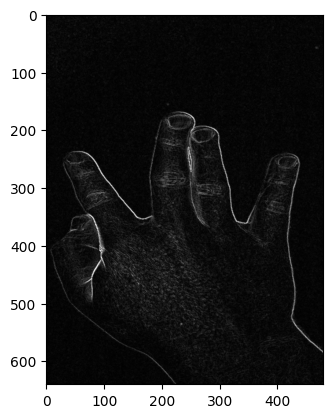

In [ ]:
gray = train[0][0][:,:,1]
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    # Gradient-Y
    # grad_y = cv.Scharr(gray,ddepth,0,1)
grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)


abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)


grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

plt.imshow(grad, cmap='gray')

C1 = (R > 95) & (G > 40) & (B > 20) - valori pentru piele caucaziana